# Analysis of stocks as per user input for given companies and time period

In [3]:
# this is important
%matplotlib inline

In [4]:
#Ishan- Importing the required packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import seaborn as sns
import seaborn
import matplotlib.mlab as mlab 
from scipy.stats import norm
import os
import sys

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


import matplotlib as mpl

# Taking input for number of stocks to analyze and creating list of tickers for those Stocks

In [ ]:
#Saad- taking user input for ticker symbol and no. of stocks instead of hard coding
def get_tick_input():
    global n
    try:
        n = int(input("Number of stocks you want to analyze:"))
        global ticker_list
        ticker_list = list()
        for i in range(n):
            tick = input("Input your stock ticker symbol: ")
            ticker_list.append(tick.upper())
        return ticker_list
    
    except ValueError:
        print('Please enter integer for number of stocks')

get_tick_input()

Number of stocks you want to analyze:4
Input your stock ticker symbol: AAPL
Input your stock ticker symbol: AXP


# Taking input for start date and end date of analysis time period

In [6]:
#Saad - input for start date and end date as global variables
def get_time_period():
    global start_date
    global end_date
    start_year = int(input("Input Start Year [xxxx]:"))
    start_month = int(input("Input Start Month [1-12]:"))
    start_day = int(input("Input Start Day:"))
    end_year = int(input("Input End Year [xxxx]:"))
    end_month = int(input("Input End Month [1-12]:"))
    end_day = int(input("Input End Day:"))

    start_date = datetime.datetime(start_year, start_month, start_day)
    end_date = datetime.datetime(end_year, end_month, end_day)
get_time_period()

Input Start Year [xxxx]:2001
Input Start Month [1-12]:1
Input Start Day:1
Input End Year [xxxx]:2018
Input End Month [1-12]:12
Input End Day:1


In [7]:
#Importing the required data
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

# tickers = ['AAPL', 'MSFT', 'IBM', 'GOOGL']
tickers = ticker_list #Saad- switching from hard coded tickers to user input

# all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
df = get(tickers, start_date, end_date) 
df_i = df
df_c = df
df_n = df
df_i = get(tickers, start_date, end_date) #Saad - switching from hard code date to user input
df_i.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2001-01-02  1.089286  1.040179  1.062500  1.062500  113078000.0   
       2001-01-03  1.191964  1.031250  1.035714  1.169643  204268400.0   
       2001-01-04  1.321429  1.200893  1.295757  1.218750  184849000.0   
       2001-01-05  1.241071  1.147321  1.209821  1.169643  103089000.0   
       2001-01-08  1.213164  1.138393  1.209821  1.183036   93424800.0   

                   Adj Close  
Ticker Date                   
AAPL   2001-01-02   0.711517  
       2001-01-03   0.783266  
       2001-01-04   0.816152  
       2001-01-05   0.783266  
       2001-01-08   0.792235

# Plotting histogram of daily percentage change for each input stock

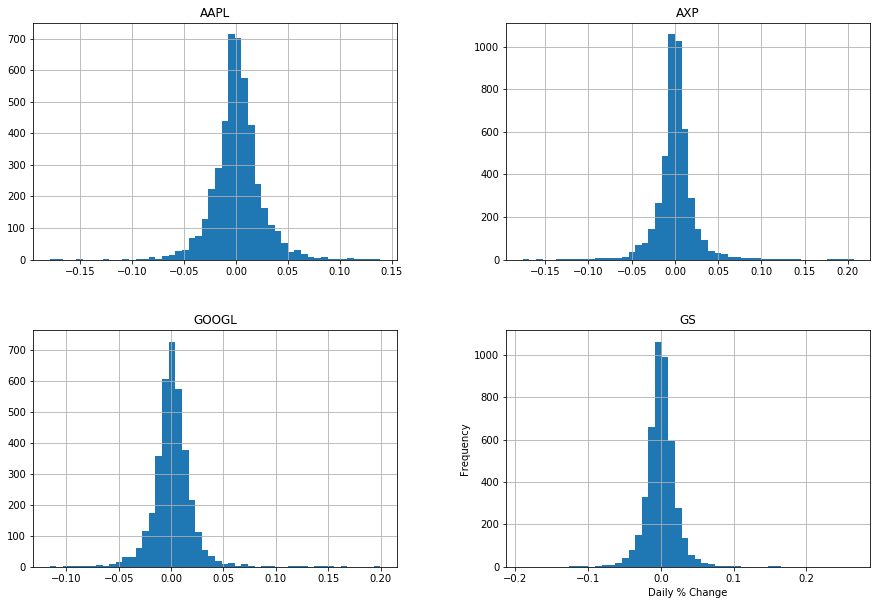

In [8]:
daily_close = df_i[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
# print(daily_close.head(100))

# Calculate the daily percentage change for `daily_close_px`
daily_pctchange = daily_close.pct_change()

daily_pctchange = daily_pctchange.iloc[1:]
# print(daily_pct_change.head(100))

# # Plot the distributions
histogram = daily_pctchange.hist(bins=50,figsize=(15,10))
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.show()

# Plotting rolling time window for 50 days and 200 days with day to day price movement

AxesSubplot(0.125,0.2;0.775x0.68)


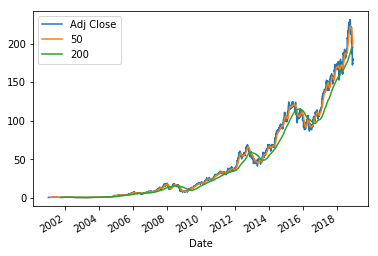

AxesSubplot(0.125,0.2;0.775x0.68)


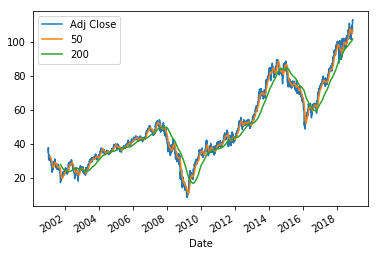

AxesSubplot(0.125,0.2;0.775x0.68)


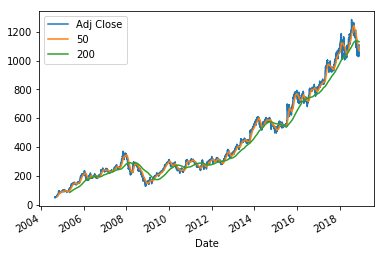

AxesSubplot(0.125,0.2;0.775x0.68)


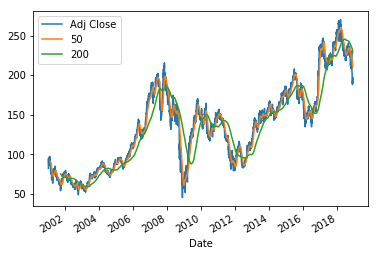

In [9]:
# Saad replacing indvidual code blocks to plot graph for each stock with one loop
for stock in ticker_list:
    ticker = pdr.get_data_yahoo(stock, 
                              start=start_date, 
                              end=end_date)

    # Isolate the adjusted closing prices 
    adj_close = ticker['Adj Close']
    adj_close = adj_close.dropna()

    # Short moving window rolling mean
    ticker['50'] = adj_close.rolling(window=30).mean()

    # Long moving window rolling mean
    ticker['200'] = adj_close.rolling(window=180).mean()

    # Plot the adjusted closing price, the short and long windows of rolling means
    print(ticker[['Adj Close','50', '200']].plot())

    plt.show()

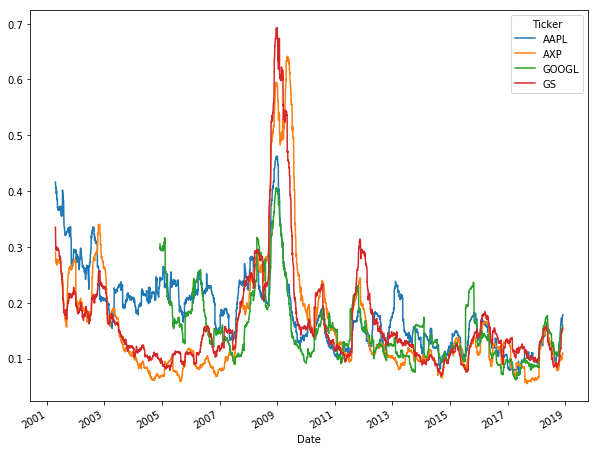

In [10]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
volatility = daily_pctchange.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
volatility.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [9]:
# visualisation



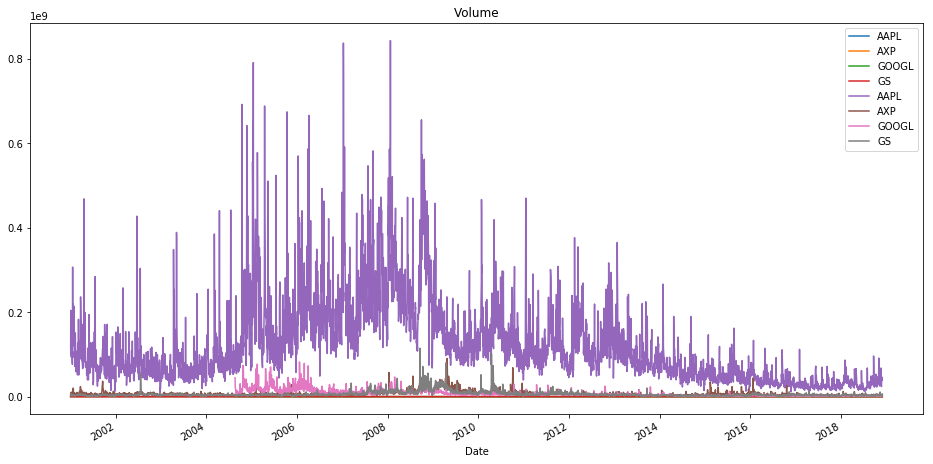

In [11]:
# Saad changed hard code to loop for any number of stocks and any tickers
start = start_date
end = end_date


df_adjclose = web.DataReader(ticker_list,'yahoo', start,end)['Adj Close']

for stock in ticker_list:
    df_adjclose[stock].plot(label = stock, figsize = (16,8), title = 'Adjusted Closing Price')
    # df_adjclose['IBM'].plot(label = 'IBM')
    # df_adjclose['MSFT'].plot(label = 'MSFT')
    # df_adjclose['FTEC'].plot(label = 'FTEC')
    plt.legend();

for stock in ticker_list:
    df_volume = web.DataReader(ticker_list,'yahoo', start,end)['Volume']
    df_volume[stock].plot(label = stock, figsize = (16,8), title = 'Volume')
    # df_volume['IBM'].plot(label = 'IBM')
    # df_volume['MSFT'].plot(label = 'MSFT')
    # df_volume['FTEC'].plot(label = 'FTEC')
    plt.legend();

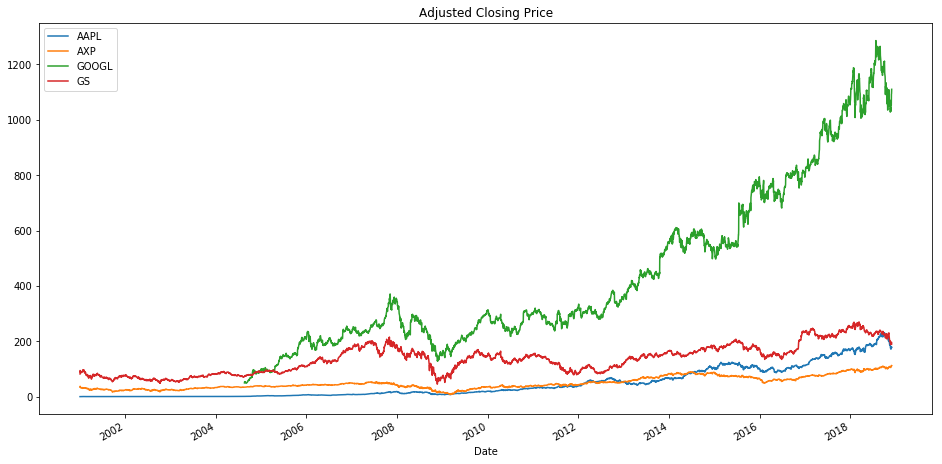

In [13]:
# Moving Average Code:

for stock in ticker_list:
    df_adjclose[stock].plot(label = stock, figsize = (16,8), title = 'Adjusted Closing Price')
#     df_adjclose['AAPL'].plot(label = 'AAPL', figsize = (16,8), title = 'Adjusted Closing Price')
#     df_adjclose['IBM'].plot(label = 'IBM')
#     df_adjclose['MSFT'].plot(label = 'MSFT')
#     df_adjclose['FTEC'].plot(label = 'FTEC')
    plt.legend();

In [2]:
start = start_date
end = end_date
df = web.DataReader(ticker_list,'yahoo', start,end)
df_ = web.DataReader(ticker_list,'yahoo', start,end)[['Close','Open']]
df1 = df['Close']
df1_ = df['Adj Close']
rets = df1.pct_change()
df_ = df_.join(rets)

# print(rets)

NameError: name 'start_date' is not defined

# Risk Analysis  - Standard Deviation and Expected Return for each stock

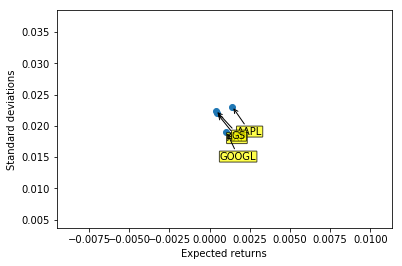

In [14]:

plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.7),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

# Taken one example of ticker and plotting scatter plot with other 3 examples

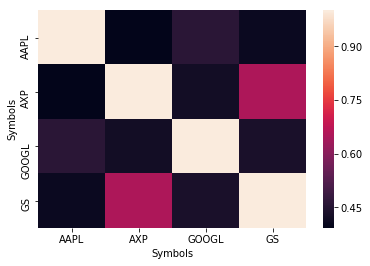

In [16]:
corr = rets.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

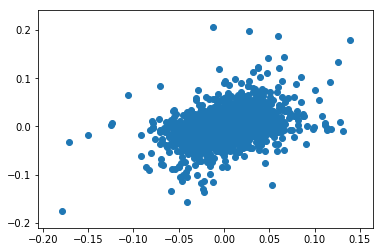

In [17]:
plt.scatter(rets.AAPL,rets.AXP)

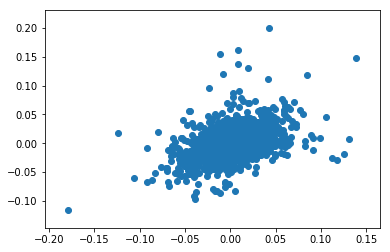

In [18]:
plt.scatter(rets.AAPL,rets.GOOGL)

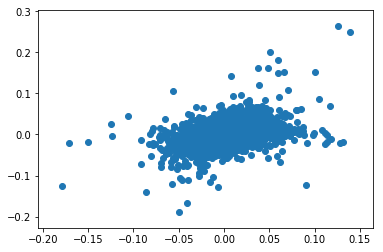

In [19]:
plt.scatter(rets.AAPL,rets.GS)

# Taking specific tickers to do ML analysis

In [20]:
start = datetime.datetime(2015,11,19)
end = datetime.datetime(2018,11,19)
df = web.DataReader(['AAPL','IBM','MSFT','FTEC'],'yahoo', start,end)
df_ = web.DataReader(['AAPL','IBM','MSFT','FTEC'],'yahoo', start,end)[['Close','Open']]
df1 = df['Close']
df1_ = df['Adj Close']
rets = df1.pct_change()
df_ = df_.join(rets)

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


### Machine Learning Analysis - Linear Regression
### Use AAPL, MSFT, IBM's Open/Close price to predict if ETF is profitable

In [21]:

df_['ETF_Up'] = np.where(df_[('Close', 'FTEC')]>df_[('Open', 'FTEC')],1,0)
df_.dropna()
df_ = df_[[('Close', 'AAPL'),('Close', 'IBM'),('Close', 'MSFT'),('Open', 'AAPL'),('Open', 'IBM'),('Open', 'MSFT'),'AAPL','IBM','MSFT',('Open', 'FTEC'),('Close', 'FTEC'),'FTEC','ETF_Up']]
# list(df_.columns.values)


In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_, test_size = 0.5)
x_train = train.iloc[0:,0:6]
y_train = train['ETF_Up']
x_test = test.iloc[0:,0:6]
y_test = test['ETF_Up']


from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

testing_predictions  = model.predict(x_test)
model.score(x_test,y_test)

0.3622721019489524

### Machine Learning Analysis - Logistic Regression

In [23]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_, test_size = 0.3)
x_train = train.iloc[0:,0:6]
y_train = train['ETF_Up']
x_test = test.iloc[0:,0:6]
y_test = test['ETF_Up']

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
print(logistic_acc)

0.7719298245614035


### Machine Learning Analysis - Random Forest

In [25]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,30, 50,100), 
     'max_samples':(.30,.40,.50,1.0),
     'max_features':(1,2,4,6),
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
inputs = df_.iloc[0:,0:6]
outputs = df_['ETF_Up']
model.fit(inputs, np.ravel(outputs))
model.best_score_, model.best_params_

(0.532484029625897,
 {'max_features': 1, 'max_samples': 1.0, 'n_estimators': 10})

In [26]:
rf = BaggingClassifier(max_features=6,max_samples=0.9,n_estimators=60)
rf.fit(x_train,y_train)
rf_acc = rf.score(x_test,y_test)
print(rf_acc)

0.6140350877192983


### Machine Learning Analysis - Neutral Network

In [27]:


X = df_.iloc[0:,0:6].values
y = df_['ETF_Up'].values

def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

Y=one_hot_encoder(y)

In [28]:
hidden_layers = (60,)
epochs = 500
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(60,), max_iter = epochs, random_state=1)

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [30]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((30,),(60,),(80,)),
    'max_iter': (500, 1000)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.8467635402906208
{'activation': 'logistic', 'hidden_layer_sizes': (60,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}


In [32]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(30,), max_iter = 1000, 
                    activation='relu',
                    learning_rate='adaptive')
clf.fit(xtrain,ytrain)
predictions = clf.predict(xtest)
actuals = ytest
tp=tn=fp=fn=0
for i in range(len(actuals)):
    a_class=p_class=0
    if int(actuals[i][0] == 0):
        a_class = 1 
    if int(predictions[i][0] == 0):
        p_class = 1
    if a_class == 1 and p_class == 1:
        tp +=1
    elif a_class == 1 and p_class == 0:
        fn +=1
    elif a_class == 0 and p_class == 0:
        tn +=1
    elif a_class == 0 and p_class == 1:
        fp +=1
print(tp,tn,fp,fn)
nn_accuracy = ((tp+tn)*100/(tp+tn+fp+fn))
print(nn_accuracy)

70 60 9 13
85.52631578947368


### Compare the Three Models

In [33]:
print("Logistic regression: %1.2f"%(logistic_acc))
print("Random forest: %1.2f"%(rf_acc))
print("Neural network: %1.2f"%(nn_accuracy))

Logistic regression: 0.77
Random forest: 0.61
Neural network: 85.53


# Regression Analysis

In [34]:
#Regression Table1 - return

X = rets[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = rets['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          4.26e-311
Time:                        19:14:47   Log-Likelihood:                 3084.2
No. Observations:                 756   AIC:                            -6160.
Df Residuals:                     752   BIC:                            -6142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e-05      0.000      0.142      0.8

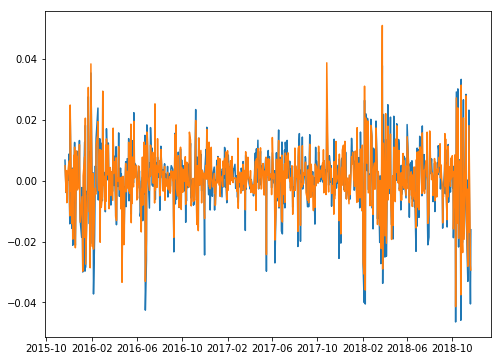

In [35]:
#Fitted Value Graph

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)  

In [36]:
#Regression Table2 - Close price
X = df1[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = df1['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:14:47   Log-Likelihood:                -1264.0
No. Observations:                 757   AIC:                             2536.
Df Residuals:                     753   BIC:                             2554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5087      0.638     -3.929      0.0

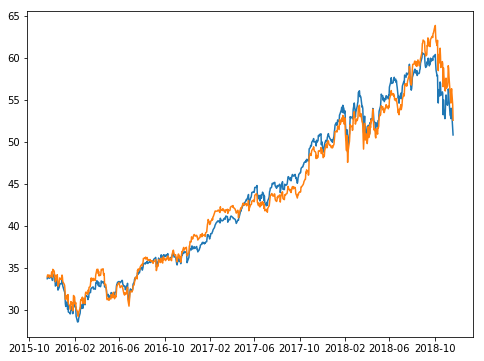

In [37]:
#Fitted Value Graph
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues) 

# Time Series Analysis - Moving Average Model

#### Moving Average Model solves the problem of heavy tails in time series data

In [11]:
p = print

In [39]:
# A general function for generating four plots
def generateplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   MSFT   No. Observations:                  757
Model:                     ARMA(0, 7)   Log Likelihood               -2151.291
Method:                           mle   S.D. of innovations              4.115
Date:                Sun, 02 Dec 2018   AIC                           4318.583
Time:                        19:15:48   BIC                           4355.618
Sample:                             0   HQIC                          4332.847
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.MSFT     2.5385      0.038     66.024      0.000       2.463       2.614
ma.L2.MSFT     4.1604      0.068     60.849      0.000       4.026       4.294
ma.L3.MSFT     5.1616      0.090     57.563      0.0

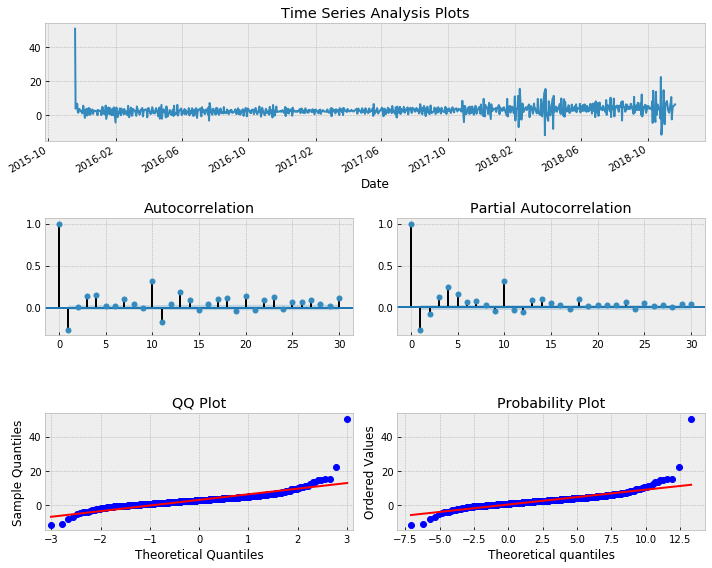

In [40]:
# Moving Average Models - MA(q)
# Data seem to be normalized (no heavy tail problem), but partial correlation still have an impact.
max_lag = 30
Y = df1_.MSFT
mdl = smt.ARMA(Y, order=(0, 7)).fit(
    maxlag=max_lag, method='mle', trend='nc')
p(mdl.summary())
_ = generateplot(mdl.resid, lags=max_lag)


# NAMHA

Basic Risk Analysis 1:
    
    Calculate the variance and std dev of a portfolio with same number of all stocks.
    
Basic Risk Analysis 2:
    
    Calculate the maximum sharpe ratio portfolio and the minimum volatility portfolio.
    The maximum sharpe ratio portfolio gives you the maximum return per unit of risk taken.

In [14]:
# Namha  - Basic Risk Analysis 1 - calculating the variance and std dev of a portfolio containing all stocks equally.

df_adjclose_returns = df_adjclose.pct_change()
df_adjclose_returns.head()
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method
cov_matrix_d = df_adjclose_returns.cov()
# Annualise the daily covariance matrix with the standard 250 trading days
cov_matrix_a = cov_matrix_d * 250
cov_matrix_a
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 
weights = np.array([0.25, 0.25, 0.25, 0.25])
weights

# Calculate the variance with the formula
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
print (str(round(port_variance, 4) * 100) + '%')  # Just converting the variance float into a percentage

#  The standard deviation of a portfolio is just a square root of its variance
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
print(str(round(port_volatility, 4) * 100) + '%')

6.950000000000001%
26.369999999999997%


# A trading Strategy: Moving average crossover technique 

The moving average cross trading strategy is used. According to this strategy, a long window and a short window moving average return is calculated. When the long window moving average is greater than the short window moving average, the stock must be bought or sold.
The plot below shows when the stock is to be bought or sold.


In [16]:
start = start_date
end = end_date
df_close = web.DataReader(ticker_list,'yahoo', start,end)['Adj Close']
df_close = df_close.pct_change()
all_rtrns = df_close
all_rtrns = all_rtrns.dropna()
all_rtrns.head()
all_rtrns = all_rtrns.reset_index()

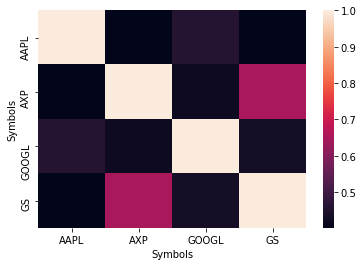

In [17]:
corr = all_rtrns.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(return_data_i, test_size = 0.3)
x_train = train.iloc[0:,1:4]
y_train = train.iloc[0:,0:1]
x_test = test.iloc[0:,1:4]
y_test = test.iloc[0:,0:1]

NameError: name 'return_data_i' is not defined

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
testing_predictions = model.predict(x_test)

In [10]:
model.score(x_test, y_test)

# Above is not automated

# Done till here

# Value at Risk

The VaR at 95% confidence interval can be defined informally as the maximum possible loss during the time if we exclude the worse outcomes whose probability is less than 95%.

For example, if the VaR is 0.01, and the company has invested 100 dollars, this means that the company is unlikely to lose more than $1 95 percent of the time.

In [20]:
# !pip install tabulate

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


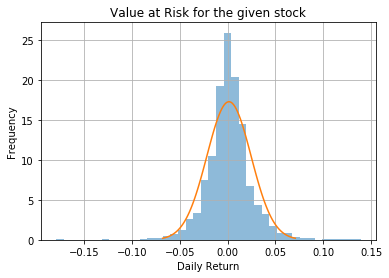

1.91: this is the 95% confience level value at risk


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


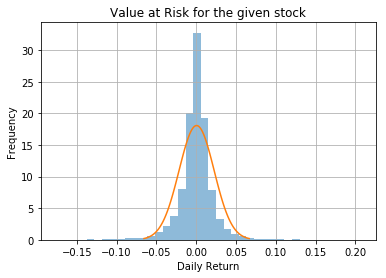

1.45: this is the 95% confience level value at risk


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


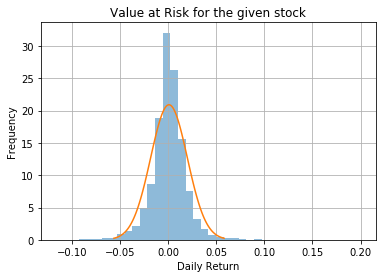

0.78: this is the 95% confience level value at risk


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


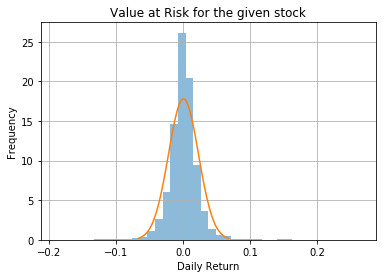

1.55: this is the 95% confience level value at risk


In [21]:
def var(i):
    start = start_date
    end = end_date
    df_adjclose_n = web.DataReader([i],'yahoo', start,end)
    df_adjclose_n['returns'] = df_adjclose_n['Adj Close'].pct_change()
    df_adjclose_n

# mean and standard deviation of the daily returns:

    mean = np.mean(df_adjclose_n['returns'])
    stddev = np.std(df_adjclose_n['returns'])
    df_adjclose_n['returns'].hist(bins = 40, normed = True, histtype = 'stepfilled', alpha = 0.5)
    x = np.linspace(mean - 3*stddev, mean + 3*stddev, 100)
    plt.plot(x, mlab.normpdf(x, mean, stddev))
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Value at Risk for the given stock')
    plt.show()
    
# calculate the VAR using the point percentile function
    var_95conf = norm.pdf(1-0.95, mean, stddev)
    var_95conf= format(var_95conf, '.2f') 
    print(str(var_95conf) + ': this is the 95% confience level value at risk')
    return

for i in ticker_list:
    var(i)

# Trading Strategy:

The moving average cross trading strategy is used. According to this strategy, a long window and a short window moving average return is calculated. When the long window moving average is greater than the short window moving average, the stock must be bought or sold.


In [15]:
#Ishan
#Building a trading strategy using moving average crossover for Apple Stocks


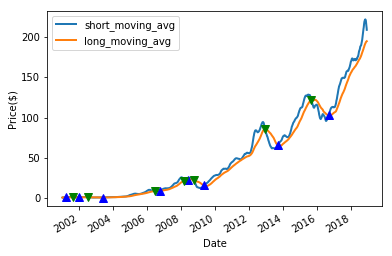

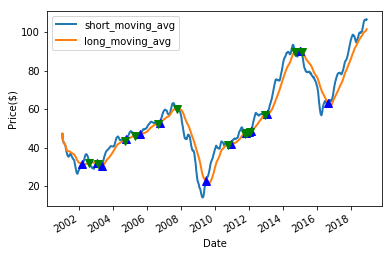

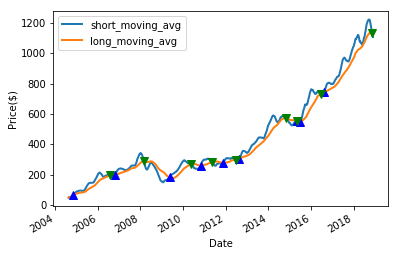

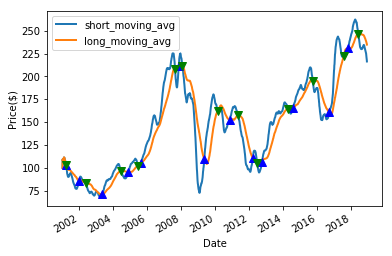

In [22]:
def trading_plot(stock):
    stock = pdr.get_data_yahoo(stock, 
                              start = start_date, 
                              end=end_date)
    # Initialize the short and long windows
    short_window = 50
    long_window = 200

    # Initialize the `cues` DataFrame with the `cue` column
    cues = pd.DataFrame(index=stock.index)
    cues['cue'] = 0.0

    # Short window moving average
    cues['short_moving_avg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Long window moving average
    cues['long_moving_avg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate Cues
    cues['cue'][short_window:] = np.where(cues['short_moving_avg'][short_window:] > cues['long_moving_avg'][short_window:], 1.0, 0.0)   

    # Create positions
    cues['positions'] = cues['cue'].diff()

    plot = plt.figure()

    # Add a subplot and label for y-axis
    ax1 = plot.add_subplot(111,  ylabel='Price($)')

    # Plot the short and long moving averages
    cues[['short_moving_avg', 'long_moving_avg']].plot(ax=ax1, lw=2.)

    # Plot the buy signals
    ax1.plot(cues.loc[cues.positions == 1.0].index, 
             cues.short_moving_avg[cues.positions == 1.0],
             '^', markersize=8, color='b')

    # Plot the sell signals
    ax1.plot(cues.loc[cues.positions == -1.0].index, 
             cues.short_moving_avg[cues.positions == -1.0],
             'v', markersize=8, color='g')

    # Show the plot
    plt.show()

    return

for stock in ticker_list:
    trading_plot(stock)

The plot below shows when the stock is to be bought or sold.

# Testing the strategy using back testing

The plot below shows the gains made when this strategy is implemented. Starting with 1000 investment, the following is the final money collected.


In [23]:
#Ishan
#Perform Backtesting

def returns_plot(stock):
    stock = pdr.get_data_yahoo(stock, 
                              start = start_date, 
                              end=end_date)
    # Set the initial capital
    initial_capital= float(100000.0)
    
    # Initialize the `cues` DataFrame with the `cue` column
    cues = pd.DataFrame(index=stock.index)
    cues['cue'] = 0.0

    # Short window moving average
    cues['short_moving_avg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Long window moving average
    cues['long_moving_avg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate Cues
    cues['cue'][short_window:] = np.where(cues['short_moving_avg'][short_window:] > cues['long_moving_avg'][short_window:], 1.0, 0.0)   

    # Create positions
    cues['positions'] = cues['cue'].diff()
    

    # Create dataframe for positions
    pos = pd.DataFrame(index=cues.index).fillna(0.0)

    # Buy 100 shares
    pos[stock] = 50*cues['cue']   

    # Create initial portfolio   
    portfolio = pos.multiply(aapl['Adj Close'], axis=0)

    # Store the difference in shares owned 
    pos_diff = pos.diff()

    # Add column for holdings
    portfolio['holdings'] = (pos.multiply(stock['Adj Close'], axis=0)).sum(axis=1)

    # Add column for cash
    portfolio['cash'] = initial_capital - (pos_diff.multiply(stock['Adj Close'], axis=0)).sum(axis=1).cumsum()   

    # Add column for total(cash + holdings)
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    # Add column for returnsreturns 
    portfolio['returns'] = portfolio['total'].pct_change()
    portfolio
    

    fig = plt.figure()

    ax1 = fig.add_subplot(111, ylabel='Portfolio ($)')

    # Generate the graph for equity values
    portfolio['total'].plot(ax=ax1, lw=2.,color='r')

    # Plot 'Going long' on the graph
    ax1.plot(portfolio.loc[cues.positions == 1.0].index, 
             portfolio.total[cues.positions == 1.0],
             '^', markersize=8, color='b')

    # Plot 'Going short' on the graph
    ax1.plot(portfolio.loc[cues.positions == -1.0].index, 
             portfolio.total[cues.positions == -1.0],
             'v', markersize=8, color='g')

    # Show the plot
    plt.show()
    
    return

for stock in ticker_list:
    returns_plot(stock)

KeyError: 'total'

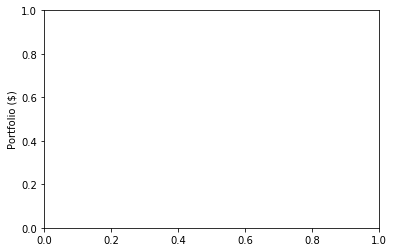

In [24]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio ($)')

# Generate the graph for equity values
portfolio['total'].plot(ax=ax1, lw=2.,color='r')

# Plot 'Going long' on the graph
ax1.plot(portfolio.loc[cues.positions == 1.0].index, 
         portfolio.total[cues.positions == 1.0],
         '^', markersize=8, color='b')

# Plot 'Going short' on the graph
ax1.plot(portfolio.loc[cues.positions == -1.0].index, 
         portfolio.total[cues.positions == -1.0],
         'v', markersize=8, color='g')

# Show the plot
plt.show()

# Evaluating the strategy:

The CAGR of this strategy is shown below.

In [25]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1
cagr

NameError: name 'aapl' is not defined

# Finding the optimal portfolio: Using Efficient Frontier 

The efficient frontier method is used to find 2 types of portfolios:
1. A portfolio that maximises the sharpe ratio : This is the return per unit of risk. Thus, a portfolio that maximises the sharpe ratio gives you the combination of stocks that maximises return/risk ratio.
2. A portfolio that minimises the risk or volatility

In [26]:
start = start_date
end = end_date
df_adjclose = web.DataReader(ticker_list,'yahoo', start,end)['Adj Close']
stocks = ticker_list

# calculate daily and annual returns and covariance of the returns stocks
# 250 is chosen because it is the number of working days in a year
returns_everyday = df_adjclose.pct_change()
returns_yearly = returns_everyday.mean() * 250 
covariance_everyday = returns_everyday.cov()
covariance_yearly = covariance_everyday * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_risk = []
sharpe_ratio = []
stock_percents = []

# set the number of combinations for imaginary portfolios
num_stocks = len(stocks)
num_portfolios = 50000

#set random seed if results are duplicated
np.random.seed(101)

# fill the empty list with each portfolios returns,risk and weights
for portfolio in range(num_portfolios):
    per_stocks = np.random.random(num_stocks)
    per_stocks/= np.sum(per_stocks)
    returns = np.dot(per_stocks, returns_yearly)
    risk = np.sqrt(np.dot(per_stocks.T, np.dot(covariance_yearly, per_stocks)))
    sharpe = returns / risk
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_risk.append(risk)
    stock_percents.append(per_stocks)

# make a dictionary for the returns, risk and sharpe ratio of each portfolio
portfolio_dict = {'Returns': port_returns,
             'Risk': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add each ticker and the stocks percent to the dictionary
for counter, stock in enumerate(stocks):
    portfolio_dict[ stock +' Weight'] = [Weight[counter] for Weight in stock_percents]

# change the dictionary to a data frame
portfolio_df = pd.DataFrame(portfolio_dict)

# find min risk & max sharpe values in the dataframe, and then create the two portfolios by selecting the row in the data frame.
min_risk = portfolio_df['Risk'].min()
max_sharpe = portfolio_df['Sharpe Ratio'].max()
sharpe_portfolio = portfolio_df.loc[portfolio_df['Sharpe Ratio'] == max_sharpe]
min_risk_port = portfolio_df.loc[portfolio_df['Risk'] == min_risk]

print('the minimum variance portfolio is:')
print(min_risk_port.T)
print('the maximum sharpe ratio portfolio is:')
print(sharpe_portfolio.T)

the minimum variance portfolio is:
                   880
Returns       0.236945
Risk          0.256755
Sharpe Ratio  0.922845
AAPL Weight   0.215449
AXP Weight    0.205984
GOOGL Weight  0.447821
GS Weight     0.130746
the maximum sharpe ratio portfolio is:
                 31757
Returns       0.319841
Risk          0.283633
Sharpe Ratio  1.127660
AAPL Weight   0.537483
AXP Weight    0.001277
GOOGL Weight  0.454285
GS Weight     0.006955


# The Efficient Frontier Graph:

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

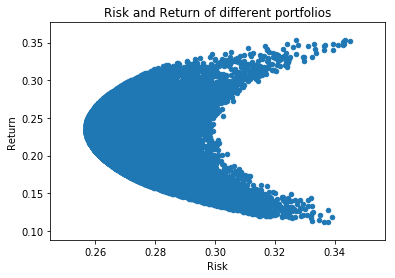

In [27]:
portfolio_df.plot.scatter(x = 'Risk', y = 'Returns')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Risk and Return of different portfolios')
plt.show()